## Final Project Part 2

In [2]:
#importing the modules, libraries and packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#importing csv file
df = pd.read_csv('AB_NYC_2019.csv')

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
#checking type
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
#changing type of room_type from object to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')

In [7]:
#checking for NaN values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#dropping rows with NaN values that cannot be resolved/replaced
df.dropna(subset = ['name', 'host_name', 'last_review', 'reviews_per_month'], inplace = True)

In [9]:
#checking for NaN
df.isna().any()

id                                False
name                              False
host_id                           False
host_name                         False
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                       False
reviews_per_month                 False
calculated_host_listings_count    False
availability_365                  False
dtype: bool

In [10]:
#looking at mean, std, min, max, etc.
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.882100e+04,3.882100e+04,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000,38821.000000
mean,1.810081e+07,6.424582e+07,40.728129,-73.951149,142.332526,5.869220,29.290255,1.373229,5.166611,114.886299
std,1.069372e+07,7.589752e+07,0.054991,0.046693,196.994756,17.389026,48.182900,1.680328,26.302954,129.529950
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,8.721444e+06,7.029525e+06,40.688640,-73.982460,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,1.887286e+07,2.837092e+07,40.721710,-73.954810,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,2.756746e+07,1.018905e+08,40.762990,-73.935020,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,3.645581e+07,2.738417e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
#checking correleations
df.corr()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
id,1.000000,0.591480,-0.010085,0.103336,-0.006696,-0.073937,-0.330019,0.291786,0.098446,0.006624
host_id,0.591480,1.000000,0.012823,0.141276,0.006263,-0.051673,-0.141973,0.296274,0.149417,0.155361
latitude,-0.010085,0.012823,1.000000,0.088259,0.031344,0.024893,-0.008559,-0.010117,0.004340,-0.021921
longitude,0.103336,0.141276,0.088259,1.000000,-0.155298,-0.055414,0.054746,0.146228,-0.093348,0.102573
price,-0.006696,0.006263,0.031344,-0.155298,1.000000,0.025501,-0.035924,-0.030623,0.052895,0.078276
minimum_nights,-0.073937,-0.051673,0.024893,-0.055414,0.025501,1.000000,-0.069366,-0.121712,0.073474,0.101658
number_of_reviews,-0.330019,-0.141973,-0.008559,0.054746,-0.035924,-0.069366,1.000000,0.549699,-0.059796,0.193409
reviews_per_month,0.291786,0.296274,-0.010117,0.146228,-0.030623,-0.121712,0.549699,1.000000,-0.009442,0.185896
calculated_host_listings_count,0.098446,0.149417,0.004340,-0.093348,0.052895,0.073474,-0.059796,-0.009442,1.000000,0.182981
availability_365,0.006624,0.155361,-0.021921,0.102573,0.078276,0.101658,0.193409,0.185896,0.182981,1.000000


In [12]:
#renaming column for clearer meaning
df.rename(columns={'neighbourhood_group': 'borough'}, inplace = True)

## Outlier Check
- source: https://www.analyticsvidhya.com/blog/2021/05/feature-engineering-how-to-detect-and-remove-outliers-with-python-code/

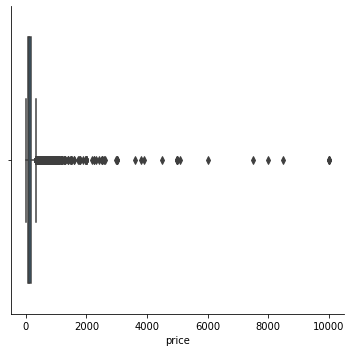

In [13]:
sns.catplot(x= 'price', kind = 'box' , data = df)

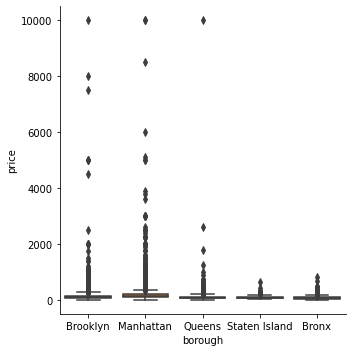

In [14]:
sns.catplot(x= 'borough', y='price', kind = 'box' , data = df)

In [15]:
#setting upper and lower limit
upper_limit = df['price'].quantile(0.75)
lower_limit = df['price'].quantile(0.25)

In [16]:
#creating new_df, filtered by values enclosed by upper and lower bounds
new_df = df[(df['price'] <= upper_limit) & (df['price'] >= lower_limit)]

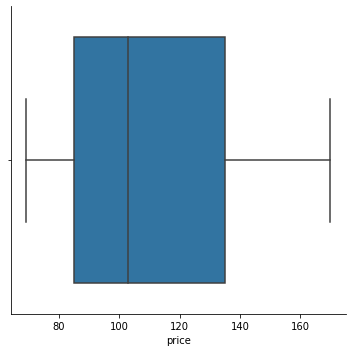

In [17]:
sns.catplot(x= 'price', kind = 'box' , data = new_df)

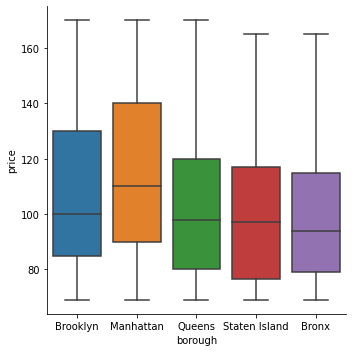

In [18]:
#price by borough
sns.catplot(x= 'borough', y='price', kind = 'box' , data = new_df)

## Using new_df to explore dataset without price outliers

In [19]:
#Counting number of listings in each borough
new_df.groupby('borough')['borough'].count()

borough
Bronx             356
Brooklyn         8448
Manhattan        8583
Queens           2087
Staten Island     147
Name: borough, dtype: int64

In [30]:
#percentage of listings in each borough
new_df.groupby('borough')['borough'].count() / len(new_df) * 100

borough
Bronx             1.814383
Brooklyn         43.055909
Manhattan        43.743948
Queens           10.636563
Staten Island     0.749197
Name: borough, dtype: float64

In [20]:
#checking mean price of listing per borough
new_df.groupby('borough')['price'].mean()

borough
Bronx             98.721910
Brooklyn         108.812027
Manhattan        114.713387
Queens           101.891711
Staten Island     99.612245
Name: price, dtype: float64

In [21]:
#checking mean yearly availibility of listing per borough
new_df.groupby('borough')['availability_365'].mean()

borough
Bronx            175.991573
Brooklyn         103.680990
Manhattan         95.479203
Queens           143.036895
Staten Island    207.340136
Name: availability_365, dtype: float64

In [23]:
#checking average number of reviews of listing per borough
new_df.groupby('borough')['number_of_reviews'].mean()

borough
Bronx            33.747191
Brooklyn         33.075166
Manhattan        30.224281
Queens           33.464303
Staten Island    37.217687
Name: number_of_reviews, dtype: float64

In [24]:
#looking at numer of listings by room type
new_df.groupby('room_type')['room_type'].count()

room_type
Entire home/apt    11033
Private room        8383
Shared room          205
Name: room_type, dtype: int64

In [25]:
#average price by room type
df.groupby('room_type')['price'].mean()

room_type
Entire home/apt    196.315929
Private room        83.985272
Shared room         63.213948
Name: price, dtype: float64

In [26]:
#average yearly availibility by room type
df.groupby('room_type')['availability_365'].mean() 

room_type
Entire home/apt    111.356134
Private room       116.500397
Shared room        165.998818
Name: availability_365, dtype: float64

In [27]:
#Neighborhoods with most listings
neighbourhood = new_df.groupby('neighbourhood')['neighbourhood'].count()
neighbourhood.sort_values(ascending = False, inplace = True)
neighbourhood[:10]

neighbourhood
Williamsburg          1710
Bedford-Stuyvesant    1553
Harlem                1261
Upper East Side        902
East Village           846
Bushwick               795
Hell's Kitchen         785
Upper West Side        780
Crown Heights          668
East Harlem            588
Name: neighbourhood, dtype: int64

In [67]:
#Neighborhoods with least listings
neighbourhood = new_df.groupby('neighbourhood')['neighbourhood'].count()
neighbourhood.sort_values(ascending = True, inplace = True)
neighbourhood[:20]

neighbourhood
Lighthouse Hill               1
Bull's Head                   1
Holliswood                    1
New Springville               1
Olinville                     1
New Brighton                  1
Westerleigh                   1
Silver Lake                   1
Jamaica Hills                 1
Whitestone                    1
Mount Eden                    1
Richmondtown                  1
Todt Hill                     1
Prince's Bay                  1
Tremont                       1
Eltingville                   1
Rossville                     1
Bay Terrace, Staten Island    1
Castle Hill                   1
Edgemere                      2
Name: neighbourhood, dtype: int64

In [41]:
#most expensive listings by neighborhood
neighbourhood_price = new_df.groupby('neighbourhood')['price'].mean()
neighbourhood_price.sort_values(ascending = False, inplace = True)
neighbourhood_price[:10]

neighbourhood
Mount Eden                    150.000000
Bay Terrace, Staten Island    150.000000
Tremont                       150.000000
Whitestone                    140.000000
Navy Yard                     136.000000
Todt Hill                     135.000000
West Village                  133.482587
Manhattan Beach               129.800000
Murray Hill                   128.420290
DUMBO                         128.142857
Name: price, dtype: float64

In [42]:
#most expensive listings by neighborhood
neighbourhood_price = new_df.groupby('neighbourhood')['price'].mean()
neighbourhood_price.sort_values(ascending = True, inplace = True)
neighbourhood_price[:10]

neighbourhood
Eltingville           70.000000
Westchester Square    72.333333
Rossville             75.000000
Arden Heights         76.000000
Grant City            76.000000
Bronxdale             76.250000
Tottenville           76.666667
Co-op City            77.500000
Richmondtown          78.000000
Woodlawn              78.000000
Name: price, dtype: float64

## Visualizations

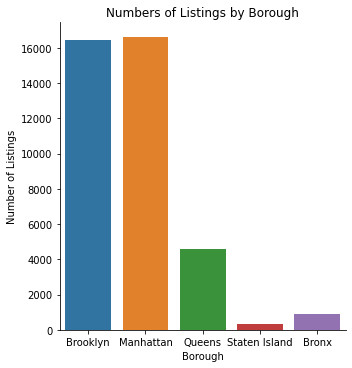

In [107]:
#breakdown of number of listings per borough
p = sns.catplot(x = 'borough', kind = 'count', data = df)
p.set(xlabel = "Borough", ylabel = "Number of Listings")
p.set(title = "Numbers of Listings by Borough")

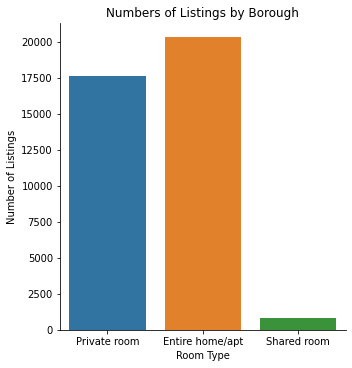

In [43]:
#breakdown of number of listings by room type
p = sns.catplot(x = 'room_type', kind = 'count', data = df)
p.set(xlabel = "Room Type", ylabel = "Number of Listings")
p.set(title = "Numbers of Listings by Borough")

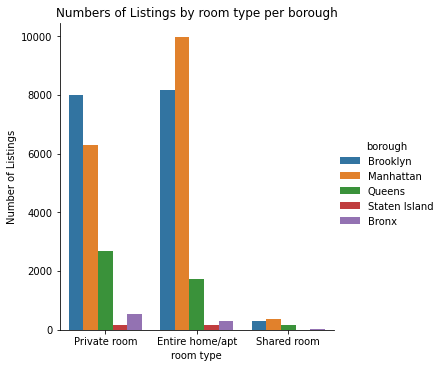

In [51]:
#breakdown of number of listings by room type per borough
p = sns.catplot(x = 'room_type', kind = 'count', data = df, hue = 'borough')
p.set(xlabel = "room type", ylabel = "Number of Listings")
p.set(title = "Numbers of Listings by room type per borough")

Text(3.674999999999997, 0.5, 'Price')

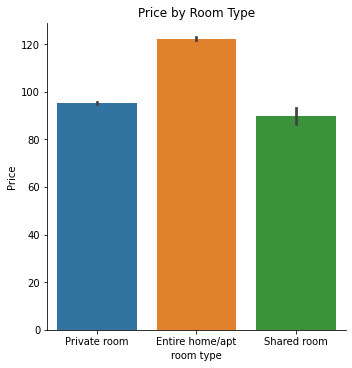

In [54]:
#avergage price by room type
sns.catplot(x ='room_type',y='price', kind = 'bar' , data = new_df)

plt.title("Price by Room Type")
plt.xlabel("room type")
plt.ylabel("Price")

Text(3.674999999999997, 0.5, 'availability_365')

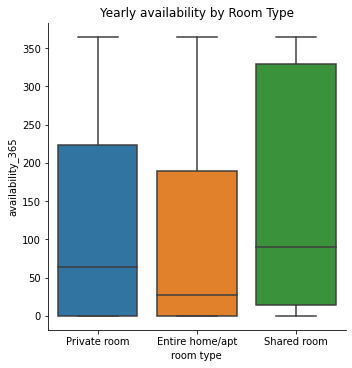

In [71]:
#Yearly availability by Room Type
sns.catplot(x= 'room_type', y='availability_365', kind = 'box' , data = new_df)

plt.title("Yearly availability by Room Type")
plt.xlabel("room type")
plt.ylabel("availability_365")

Text(0.5, 0, 'Neighborhoods')

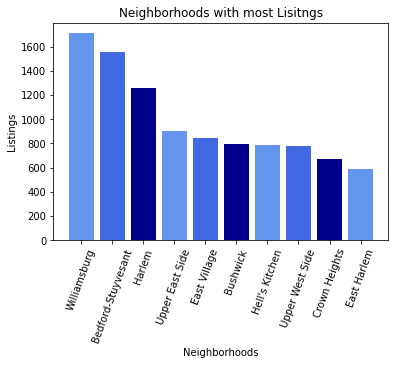

In [75]:
#Neighborhoods with the most Listings

neighbourhood = new_df.groupby('neighbourhood')['neighbourhood'].count().nlargest(10)

x = list(neighbourhood.index)
y = list(neighbourhood.values)
plt.bar(x, y, color=['cornflowerblue', 'royalblue', 'darkblue'])
plt.xticks(rotation=70)

plt.title("Neighborhoods with most Lisitngs")
plt.ylabel("Listings")
plt.xlabel("Neighborhoods")

Text(0.5, 0, 'Neighborhoods')

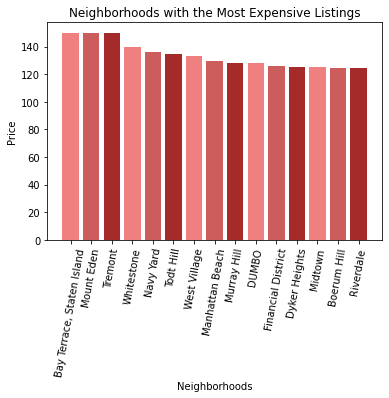

In [114]:
#Neighborhoods with the Most Expensive Listings

neighbourhood_price = new_df.groupby('neighbourhood')['price'].mean().nlargest(15)

x = list(neighbourhood_price.index)
y = list(neighbourhood_price.values)
plt.bar(x, y, color=['lightcoral', 'indianred', 'brown'])
plt.xticks(rotation=80)

plt.title("Neighborhoods with the Most Expensive Listings")
plt.ylabel("Price")
plt.xlabel("Neighborhoods")

Text(0.5, 0, 'Neighborhoods')

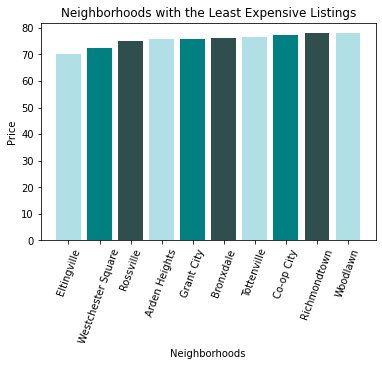

In [115]:
#Neighborhoods with the Least Expensive Listings

neighbourhood_price = new_df.groupby('neighbourhood')['price'].mean().nsmallest(10)

x = list(neighbourhood_price.index)
y = list(neighbourhood_price.values)
plt.bar(x, y, color=['powderblue', 'teal', 'darkslategrey'])
plt.xticks(rotation=70)

plt.title("Neighborhoods with the Least Expensive Listings")
plt.ylabel("Price")
plt.xlabel("Neighborhoods")

Text(0.5, 0, 'Borough')

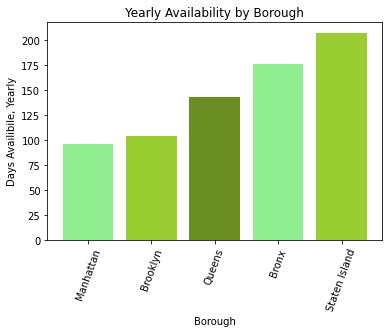

In [61]:
#Boroughs by yearly listing availibility

neighbourhood = new_df.groupby('borough')['availability_365'].mean().nsmallest()

x = list(neighbourhood.index)
y = list(neighbourhood.values)
plt.bar(x, y, color=['lightgreen','yellowgreen', 'olivedrab'])
plt.xticks(rotation=70)

plt.title("Yearly Availability by Borough")
plt.ylabel("Days Availibile, Yearly")
plt.xlabel("Borough")

/Users/sabella/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

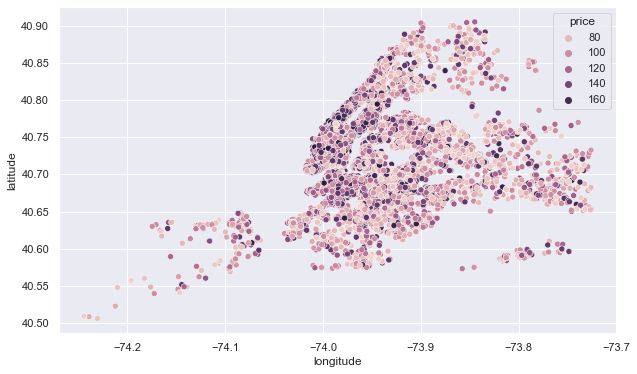

In [195]:
plt.figure(figsize=(10,6))
sns.scatterplot(new_df.longitude,new_df.latitude, hue=new_df.price)

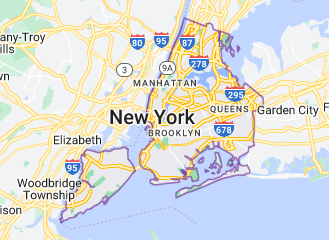

# Findings

#### Borough Findings
- Brooklyn and Manhattan are the two boroughs with the highest number of listings
    - Manhattan listings make up 43.743948% of the total listings
    - Brooklyn listings make up 43.055909% of the total listings
    - Queens, 10.636563%
    - Bronx, 1.814383%
    - Staten Island, 0.749197%
    
- Brooklyn and Manhattan also average the most expensive listings
    - An average listing in Manhattan is around 114.00 dollars per night, while in Brooklyn, the average price of listing is 108 dollars per night.
- Manhattan Listings have lower yearly availibility averaging about 95 days

#### Room Type Findings
- Entire home/apt are the most common listing and are also the most expensive
    - Shared Room is least common but least expensive
- Entire home/apt and Private rooms have lower yearly availability compared to shared rooms

#### Neighborhood Findings
- Williamsburg has the most listings with Bedford-Stuyvesant, Harlem, Upper East Side, and East Village following.   
- Mount Eden, Bay Terrace, Tremont, Whitestone, Navy Yard, Todt Hill, West Village, Manhattan Beach, Murray Hill, and DUMBO are the 10 most expensive neighborhoods in terms of listing prices
- Eltingville, Westchester Square, and Rossville are the neighborhoods with the least expensive listings prices